In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [46]:
# Load dataset
data_train  = pd.read_csv("citrus.csv")
data_train

name  diameter  weight  red  green  blue
0         orange      2.96   86.76  172     85     2
1         orange      3.91   88.05  166     78     3
2         orange      4.42   95.17  156     81     2
3         orange      4.47   95.60  163     81     4
4         orange      4.48   95.76  161     72     9
...          ...       ...     ...  ...    ...   ...
9995  grapefruit     15.35  253.89  149     77    20
9996  grapefruit     15.41  254.67  148     68     7
9997  grapefruit     15.59  256.50  168     82    20
9998  grapefruit     15.92  260.14  142     72    11
9999  grapefruit     16.45  261.51  152     74     2

[10000 rows x 6 columns]

In [47]:
data_train.name.value_counts()
pd.get_dummies(data_train.name)

grapefruit  orange
0              0       1
1              0       1
2              0       1
3              0       1
4              0       1
...          ...     ...
9995           1       0
9996           1       0
9997           1       0
9998           1       0
9999           1       0

[10000 rows x 2 columns]

In [48]:
x_train     = data_train.iloc[:,1:6].values
y_train     = pd.get_dummies(data_train.name).values
row,coloumn = x_train.shape

In [49]:
y_train

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [50]:
# Encoding
# x
# for i in range(coloumn):
#     x_train[: , i] = LabelEncoder().fit_transform(x_train[:,i])
# y
# y_train            = LabelEncoder().fit_transform(y_train)

In [51]:
# Normalize X
maxx = []
minn = []
for i in range(coloumn):
    maxx.append(np.max(x_train[:,i]))
    minn.append(np.min(x_train[:,i]))
print(maxx)
print(minn)

[16.45, 261.51, 192.0, 116.0, 56.0]
[2.96, 86.76, 115.0, 31.0, 2.0]


In [52]:
# Normalize X
for i in range(coloumn):  
    for j in range(row):
        x_train[j , i] = (x_train[j , i]- minn[i])/(maxx[i]-minn[i])

In [53]:
x_train

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

In [54]:
# Function
def sigmoid(x):
    return 1/(1+np.exp(-x))
sig = np.vectorize(sigmoid)

In [55]:
#-------------------------------------
#- inisiasi

input       = x_train
target      = y_train
num_input   = 5
net_hidden1 = 15
net_hidden2 = 30
num_output  = 2

#Input-->Hidden Layer1
w_hidden1 = np.random.uniform(low=-1, high=1, size=(num_input,net_hidden1))
b_hidden1 = np.random.uniform(low=-1, high=1, size=(net_hidden1))
#Hidden Layer1-->Hidden Layer2
w_hidden2 = np.random.uniform(low=-1, high=1, size=(net_hidden1,net_hidden2))
b_hidden2 = np.random.uniform(low=-1, high=1, size=(net_hidden2))
#Hidden Layer2-->Output
w_output = np.random.uniform(low=-1, high=1, size=(net_hidden2,num_output))
b_output = np.random.uniform(low=-1, high=1, size=(num_output))

# Loss dan Akurasi
loss_values = []
acc_values  = []

lr     = 0.1
epochs = 100

In [56]:
print(w_hidden1.shape)
print(w_hidden2.shape)
print(w_output.shape)

(5, 15)
(15, 30)
(30, 2)


In [ ]:
list_w_hidden1 = []
list_w_hidden2 = []
list_w_output  = []
list_b_hidden1 = []
list_b_hidden2 = []
list_b_output  = []

for epoch in range(epochs):
    MSE = 0
    new_target = np.zeros((len(target),num_output))
    for idx, inp in enumerate(input):
        # A. Feedforward
        
        # Hidden Layer1
        o_hidden1 = np.matmul(input[idx], w_hidden1) + b_hidden1
        o_hidden1 = sig(o_hidden1)
        # Hidden Layer2
        o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
        o_hidden2 = sig(o_hidden2)
        # Outpur Layer
        o_output  = np.matmul(o_hidden2, w_output) + b_output
        o_output  = sig(o_output)
        
        # Menghitung Error
        error           = target[idx] - o_output
        MSE             = MSE + (error*error)
        new_target[idx] = o_output
        # Error hidden2->output
        eh2             = error @ w_output.T
        # Error hidden1->output 
        eh1             = eh2   @ w_hidden2.T
        
        # B. Backpropagation
        
        # Outpur Layer
        w_output = w_output + (lr * ((error * o_output * (1 - o_output))* o_hidden2[np.newaxis].T))
        b_output = b_output + (lr * ((error * o_output * (1 - o_output))))
        # Hidden Layer2
        w_hidden2 = w_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2))* o_hidden1[np.newaxis].T)
        b_hidden2 = b_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2)))
        # Hidden Layer1
        w_hidden1 = w_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1))* input[idx][np.newaxis].T)
        b_hidden1 = b_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1)))
        
    MSE = MSE/len(target)
    acc = 1 - (np.sum(np.absolute(target-new_target))/len(target))
    loss_values.append(MSE)
    acc_values.append(acc)
    list_w_hidden1.append(w_hidden1)
    list_w_hidden2.append(w_hidden2)
    list_w_output.append(w_output)
    list_b_hidden1.append(b_hidden1)
    list_b_hidden2.append(b_hidden2)
    list_b_output.append(b_output)
    print("epoch : ",epoch," | error : ",MSE," | acc : ",acc)

#Mencari data dengan akurasi terbaik
acc_max   = max(acc_values)
index_max = acc_values.index(acc_max)
w_hidden1 = list_w_hidden1[index_max]
w_hidden2 = list_w_hidden2[index_max]
w_output  = list_w_output[index_max]
b_hidden1 = list_b_hidden1[index_max]
b_hidden2 = list_b_hidden2[index_max]
b_output  = list_b_output[index_max]

epoch :  0  | error :  [0.00316118 0.00374101]  | acc :  0.974377932364285
epoch :  1  | error :  [0.0070232  0.00700809]  | acc :  0.9659196920299729
epoch :  2  | error :  [0.00382662 0.00364077]  | acc :  0.9743214365741474
epoch :  3  | error :  [0.00238809 0.00232373]  | acc :  0.9798468617264712
epoch :  4  | error :  [0.00162555 0.0016082 ]  | acc :  0.9832246528277558
epoch :  5  | error :  [0.00132527 0.00131498]  | acc :  0.9858157400397289
epoch :  6  | error :  [0.00129586 0.00129448]  | acc :  0.9871039597482255
epoch :  7  | error :  [0.00141166 0.0014234 ]  | acc :  0.9871247778886043
epoch :  8  | error :  [0.00153758 0.00156651]  | acc :  0.9882635541368264
epoch :  9  | error :  [0.00164236 0.00166701]  | acc :  0.9889498384228916
epoch :  10  | error :  [0.00168368 0.00170351]  | acc :  0.9890600277935812
epoch :  11  | error :  [0.00172022 0.00173628]  | acc :  0.9886213231922204
epoch :  12  | error :  [0.00177578 0.00178593]  | acc :  0.9879304945708266
epoch :  1

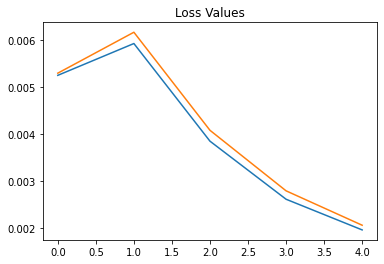

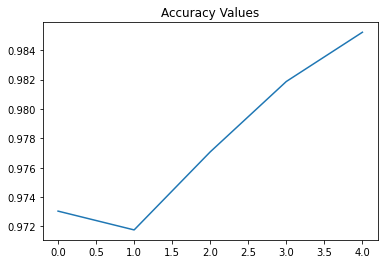

In [15]:
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.title("Nilai Loss")
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.title("Nilai Akurasi")
plt.show()

In [ ]:
def predict(data):
    HasilPredict = []
    PredResult   = []
    for i in data:
        # Hidden Layer1
        o_hidden1 = np.matmul(i, w_hidden1) + b_hidden1
        o_hidden1 = sig(o_hidden1)
        # Hidden Layer2
        o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
        o_hidden2 = sig(o_hidden2)
        # Outpur Layer
        o_output  = np.matmul(o_hidden2, w_output) + b_output
        o_output  = sig(o_output)
        HasilPredict.append(o_output)
    for i in HasilPredict:
        for j in range ((len(i))-1):
            if i[j+1] > i[j]:
                result = 0
            else:
                result = 1
        PredResult.append(result)
    return PredResult

In [44]:
prediksi = predict(x_train)
print(prediksi)

[array([0.06188897, 0.92487293])]
[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612])]
[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498])]
[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468])]
[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569])]
[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617])]
[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213])]
[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.3

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

[array([0.06188897, 0.92487293]), array([0.17571365, 0.79591612]), array([0.37048228, 0.59131498]), array([0.3989186, 0.5625468]), array([0.83411406, 0.15365569]), array([0.33435888, 0.63044617]), array([0.40491757, 0.55587213]), array([0.80801795, 0.17643548]), array([0.93287082, 0.06479643]), array([0.7598928 , 0.21951009]), array([0.56813947, 0.39852778]), array([0.61232403, 0.35151649]), array([0.75955804, 0.22566457]), array([0.58557148, 0.38162177]), array([0.36396329, 0.59399111]), array([0.89127333, 0.10208681]), array([0.69440595, 0.27773215]), array([0.74990478, 0.22694368]), array([0.98534007, 0.01452694]), array([0.44909501, 0.50480309]), array([0.62253985, 0.34196922]), array([0.48119769, 0.47937229]), array([0.41760307, 0.53889331]), array([0.80489063, 0.17711579]), array([0.84548003, 0.14143613]), array([0.52654772, 0.43150462]), array([0.69368163, 0.27489888]), array([0.95579951, 0.04120012]), array([0.66161085, 0.30708135]), array([0.97519082, 0.02395898]), array([0.78

KeyboardInterrupt: 

In [42]:
data_train

name  diameter  weight  red  green  blue
0         orange      2.96   86.76  172     85     2
1         orange      3.91   88.05  166     78     3
2         orange      4.42   95.17  156     81     2
3         orange      4.47   95.60  163     81     4
4         orange      4.48   95.76  161     72     9
...          ...       ...     ...  ...    ...   ...
9995  grapefruit     15.35  253.89  149     77    20
9996  grapefruit     15.41  254.67  148     68     7
9997  grapefruit     15.59  256.50  168     82    20
9998  grapefruit     15.92  260.14  142     72    11
9999  grapefruit     16.45  261.51  152     74     2

[10000 rows x 6 columns]

In [40]:
from tkinter import *
from tkinter.ttk import Combobox
from tkinter import messagebox


class Test:
    def __init__(self, tk):
        self.var = StringVar()
        self.data = (0, 1)
        self.lb0 = Label(tk,  text = 'MULTILAYER PERCEPTRON PREDIKSI KESELAMATAN PENUMPANG TITANIC',
                         font = ("Times",12)).place(x=15,y=0)
        self.lb1 = Label(tk,  text = 'Sex',font = ("Times",9)).place(x=5,y=50)
        self.lb2 = Label(tk,  text = 'Age',font = ("Times",9)).place(x=5,y=75)
        self.lb3 = Label(tk,  text = 'SibSp',font = ("Times",9)).place(x=5,y=100)
        self.lb4 = Label(tk,  text = 'Parch',font = ("Times",9)).place(x=5,y=125)
        self.lb5 = Label(tk,  text = 'Fare',font = ("Times",9)).place(x=5,y=150)
        self.lb6 = Label(tk,  text = 'Embarked',font = ("Times",9)).place(x=5,y=175)
        #---------------------------------------------------------------------------------------------
        self.cb1 = Combobox(tk, values=self.data,font = ("Times",9), width=17)
        self.cb1.place(x=80, y=50)
        self.e2  = Entry(tk,font = ("Times",9) )
        self.e2.place(x=80,y=75)
        self.e3  = Entry(tk,font = ("Times",9) )
        self.e3.place(x=80,y=100)
        self.e4  = Entry(tk,font = ("Times",9) )
        self.e4.place(x=80,y=125)
        self.e5  = Entry(tk,font = ("Times",9) )
        self.e5.place(x=80,y=150)
        self.e6  = Entry(tk,font = ("Times",9) )
        self.e6.place(x=80,y=175)
        #---------------------------------------------------------------------------------------------
        self.b1  = Button(tk, text="Prediksi",font = ("Times",9), command=self.select).place(x=300, y=250, anchor=CENTER)
        self.lb7 = Label(tk,  text = 'Hasil', font = ("Times",9))
        self.lb7.place(x=300, y=300, anchor=CENTER)
        
    def select(self):
        data   = []
        value1 = (float(self.cb1.get())-minn[0])/(maxx[0]-minn[0])
        #messagebox.showinfo("Warn", "You selected " + value)
        value2 = (float(self.e2.get())-minn[1])/(maxx[1]-minn[1])
        value3 = (float(self.e3.get())-minn[2])/(maxx[2]-minn[2])
        value4 = (float(self.e4.get())-minn[3])/(maxx[3]-minn[3])
        value5 = (float(self.e5.get())-minn[4])/(maxx[4]-minn[4])
        value6 = (float(self.e6.get())-minn[5])/(maxx[5]-minn[5])
        data.append(value1)
        data.append(value2)
        data.append(value3)
        data.append(value4)
        data.append(value5)
        data.append(value6)
        HasilPredict = []
        print(data)
        for i in data:
            # Hidden Layer1
            o_hidden1 = np.matmul(data, w_hidden1) + b_hidden1
            o_hidden1 = sig(o_hidden1)
            # Hidden Layer2
            o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
            o_hidden2 = sig(o_hidden2)
            # Outpur Layer
            o_output  = np.matmul(o_hidden2, w_output) + b_output
            o_output  = sig(o_output)
            HasilPredict.append(round(float(o_output)))
        for i in HasilPredict:
            if i == 1 :
                a = 'Selamat'
            elif i == 0 :
                a = 'Tewas'
        self.lb7.config(text=a)
tk = Tk()
tk.geometry("600x350")
tk.title("MULTILAYER PERCEPTRON")
tt = Test(tk)
tk.mainloop()

[1.0, 0.7613636363636364, 0.6666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.7613636363636364, 0.6666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.6666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.6072874493927125, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.6072874493927125, 0.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.46558704453441296, 0.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.708502024291498, 0.0]
[0.0, 0.3409090909090909, 0.16666666666666666, 0.6666666666666666, 0.708502024291498, 0.0]
[0.0, 0.5227272727272727, 0.16666666666666666, 0.0, 0.708502024291498, 0.0]
[0.0, 0.5227272727

C:\Python3_7\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.00809716599190283